## Visualize Boundary Points

In [4]:
import sys
sys.path.insert(0, '../')
from config import *
from dataset import *
import umap
import umap.plot
from torch.utils.tensorboard import SummaryWriter


In [2]:
ckpt_addr = "../checkpoint/MNIST/ood_boundary[256].pt"
ckpt = torch.load(ckpt_addr)

In [3]:
xin, xout = ckpt['indx'], ckpt['ood_x']
ood_x, ood_y = ckpt['ood_img'], ckpt['ood_label']
xb, yb = ckpt['boundary_x'], ckpt['boundary_y']

In [106]:
xb.shape

torch.Size([602, 1, 28, 28])

### Prelim

In [4]:
xin, xout = ckpt['indx'], ckpt['ood_x']
ood_x, ood_y = ckpt['ood_img'], ckpt['ood_label']
xb, yb = ckpt['boundary_x'], ckpt['boundary_y']
xin = relabel_tuples(xin, np.arange(5), [2,3,6,8,9])
xin, yin = tuple_list_to_tensor(xin)
xin = xin.flatten(1,3)
xout, yout = tuple_list_to_tensor(xout)
xout = xout.flatten(1,3)
x_vis = torch.cat([xout, xin],dim=0)
y_vis = torch.cat([yout, yin], dim=0)
ic(x_vis.shape)
ic(y_vis.shape)
mapper = umap.UMAP().fit(x_vis)

ic| x_vis.shape: torch.Size([42814, 784])
ic| y_vis.shape: torch.Size([42814])


<AxesSubplot:>

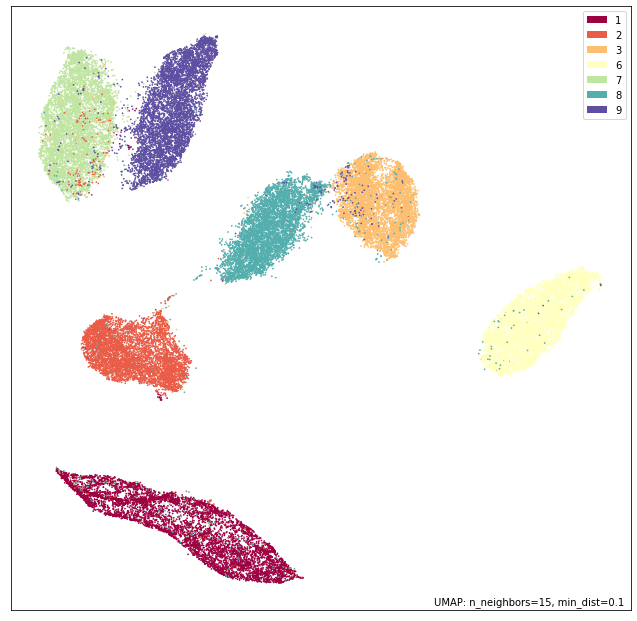

In [6]:
umap.plot.points(mapper, labels=y_vis)

### Plot

In [5]:
xin, xout = ckpt['indx'], ckpt['ood_x']
ood_x, ood_y = ckpt['ood_img'], ckpt['ood_label']
xb, yb = ckpt['boundary_x'], ckpt['boundary_y']
# Xin: 1
xin, yin = tuple_list_to_tensor(xin)
xin = xin.flatten(1,3)
ic(xin.shape)
ic(yin.shape)
yin = torch.ones(len(xin))
# Xout: 0
xout, yout = tuple_list_to_tensor(xout)
xout = xout.flatten(1,3)
ic(xout.shape)
ic(yout.shape)
yout = torch.zeros(len(xout))
# Xb: 2
xb = xb.flatten(1,3)
ic(xb.shape)
yb = torch.ones(len(xb)) * 2
ic(yb.shape)
# Xood: -1 (sample)
ood_x = ood_x.flatten(1,3)
ic(ood_x.shape)
ood_y = torch.ones(ood_x.shape[0]) * -1
ic(ood_y.shape)

ic| xin.shape: torch.Size([29807, 784])
ic| yin.shape: torch.Size([29807])
ic| xout.shape: torch.Size([13007, 784])
ic| yout.shape: torch.Size([13007])
ic| xb.shape: torch.Size([602, 784])
ic| yb.shape: torch.Size([602])
ic| ood_x.shape: torch.Size([256, 784])
ic| ood_y.shape: torch.Size([256])


torch.Size([256])

#### With sample center

In [ ]:
xin_b = torch.load("../checkpoint/MNIST/xin.pt",map_location=torch.device('cpu'))
cluster_center = torch.cat([xin_b[cls].mean(dim=0).reshape((1, 784)) for cls in xin_b])
ic(cluster_center.shape)
cluster_center_label = torch.ones(5)*10
ic(cluster_center_label.shape)
    

ic| cluster_center.shape: torch.Size([5, 784])
ic| cluster_center_label.shape: torch.Size([5])


torch.Size([5])

In [6]:
# Combine
x_vis = torch.cat([ood_x, xout, xin],dim=0)
y_vis = torch.cat([ood_y, yout, yin], dim=0)
# x_vis = torch.cat([ood_x, xout, xin, xb, cluster_center],dim=0)
# y_vis = torch.cat([ood_y, yout, yin, yb, cluster_center_label], dim=0)
ic(x_vis.shape)
ic(y_vis.shape)
mapper = umap.UMAP().fit(x_vis)

ic| x_vis.shape: torch.Size([43070, 784])
ic| y_vis.shape: torch.Size([43070])


<AxesSubplot:>

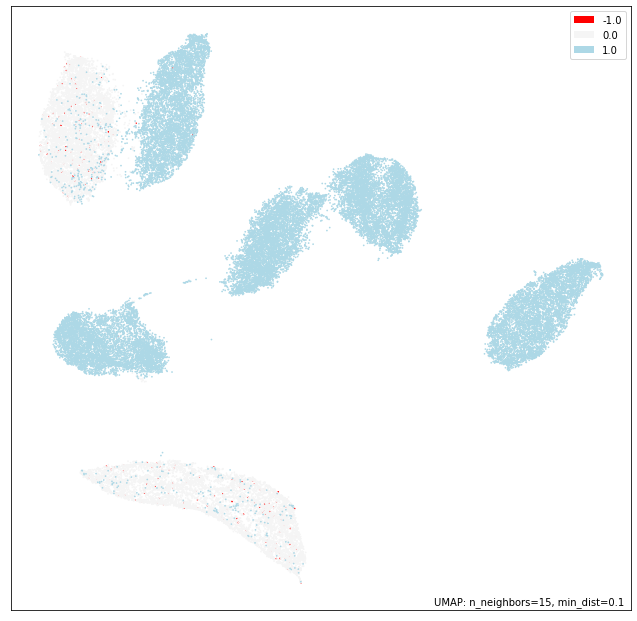

In [8]:
umap.plot.points(mapper, labels=y_vis, color_key=['red', '#F5F5F5', 'lightblue'])

### With Gz

In [19]:
gz = torch.load("../checkpoint/MNIST/gz[256][ood-gz].pt", map_location=torch.device('cpu'))
# gz = torch.load("../checkpoint/MNIST/gz[256][3].pt", map_location=torch.device('cpu'))
ic(gz.shape)
gz = gz.reshape((-1,784)).detach()
ic(gz.shape)
gz = (gz - gz.mean(dim=1,keepdim=True)/gz.std(dim=1, keepdim=True))

ic| gz.shape: torch.Size([2000, 1, 28, 28])
ic| gz.shape: torch.Size([2000, 784])


In [59]:
xvis = torch.cat([x_vis, gz], dim=0)
yvis = torch.cat([y_vis, torch.ones(gz.shape[0]) * 3], dim=0)
# Normalization before visualization
xvis = (xvis - xvis.mean(dim=1,keepdim=True)/xvis.std(dim=1, keepdim=True))
mapper = umap.UMAP().fit(xvis)

<AxesSubplot:>

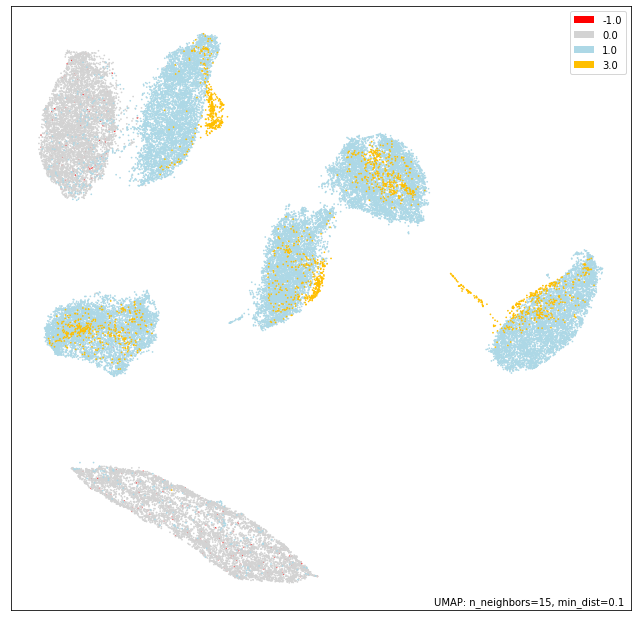

In [60]:
umap.plot.points(mapper, labels=yvis, color_key=['red', 'lightgray', 'lightblue', '#ffbf00'])

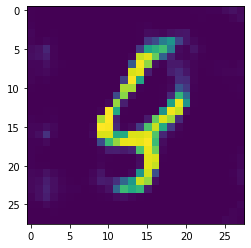

In [26]:
gz = gz.reshape((2000, 1,28,28))
# Some examples: 1034, 1087, 987 (like 1), 222, 79, 14
img = gz[98]
img.shape
plt.imshow(img.squeeze())

In [155]:
xin, xout = ckpt['indx'], ckpt['ood_x']
ood_x, ood_y = ckpt['ood_img'], ckpt['ood_label']
xb, yb = ckpt['boundary_x'], ckpt['boundary_y']

In [49]:
# Xin: 1
xin, yin = tuple_list_to_tensor(xin)
target = xin[4].reshape((1, 784))
ic(target.shape)
target = (target - target.min()) / (target.max()-target.min())

RuntimeError: shape '[1, 784]' is invalid for input of size 1

In [48]:
plt.imshow(target.reshape((28, 28)))
# plt.imshow(xin[0].squeeze())

NameError: name 'target' is not defined

In [136]:
gz = gz.reshape((-1, 784))
gz.shape

torch.Size([500, 784])

In [158]:
cur = None
curdist = 1000
# curdist = -1000
tidx = -1
for idx, item in enumerate(gz):
    item = (item - item.min())/(item.max() - item.min())
    item = item.reshape((1,784))
    target_mat = torch.cat([item, target])  # 2 x HW
    # dist = torch.abs(torch.corrcoef(target_mat)[0][1])
    dist = torch.norm(item-target)
    if dist < curdist:
    # if dist > curdist:
        curdist = dist
        tidx = idx
        cur = item

In [159]:
tidx

130

In [160]:
a = (target - cur)**2
a.shape

torch.Size([1, 784])

In [161]:
torch.max(target - cur)

tensor(0.9999)

In [162]:
torch.sum((target - cur)**2)**0.5

tensor(6.9263)

In [163]:
curdist = curdist **2

In [164]:
(curdist/784)**0.5

tensor(0.2474)

In [36]:
cur.shape
cur = cur.reshape((28,28,1))

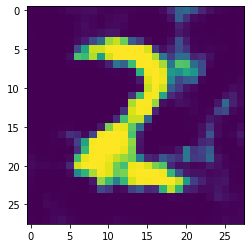

In [143]:
plt.imshow(cur.reshape((28, 28)))